#18266401 Lab - Week 03
Made using Google Colab by Ayoub Jdair

#Imports

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#For mounting google drive to colab sheet, this is where my files are stored and will be pulled from
from google.colab import drive
from sklearn.preprocessing import LabelEncoder

In [46]:
drive.mount('/content/MyDrive')
df = pd.read_csv('bank.csv')

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


# Understanding the Data

In [47]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [48]:
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


Examination of Numerical Attributes

In [49]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


Check for null values. 

*I would prefer not to calculate these manually from the above cells to eliminate human error!*

In [50]:
df.isnull().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

Check for duplicates

*We can see there are no duplicate rows in the data set, great!*

In [51]:
print(df.duplicated().value_counts())

False    2000
dtype: int64


Getting numerical data

*Lets see what numerical data we have to work with...*

In [52]:
numerical_data = df._get_numeric_data()
numerical_data.columns.tolist()

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

Plotting a heat map & a pairplot

*This will show us some important correlations between the data*

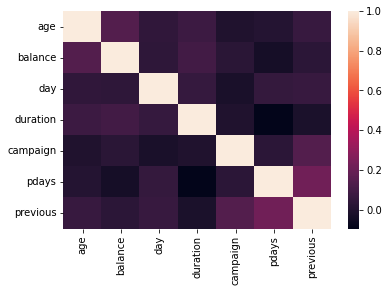

In [53]:
sns.heatmap(df.corr());

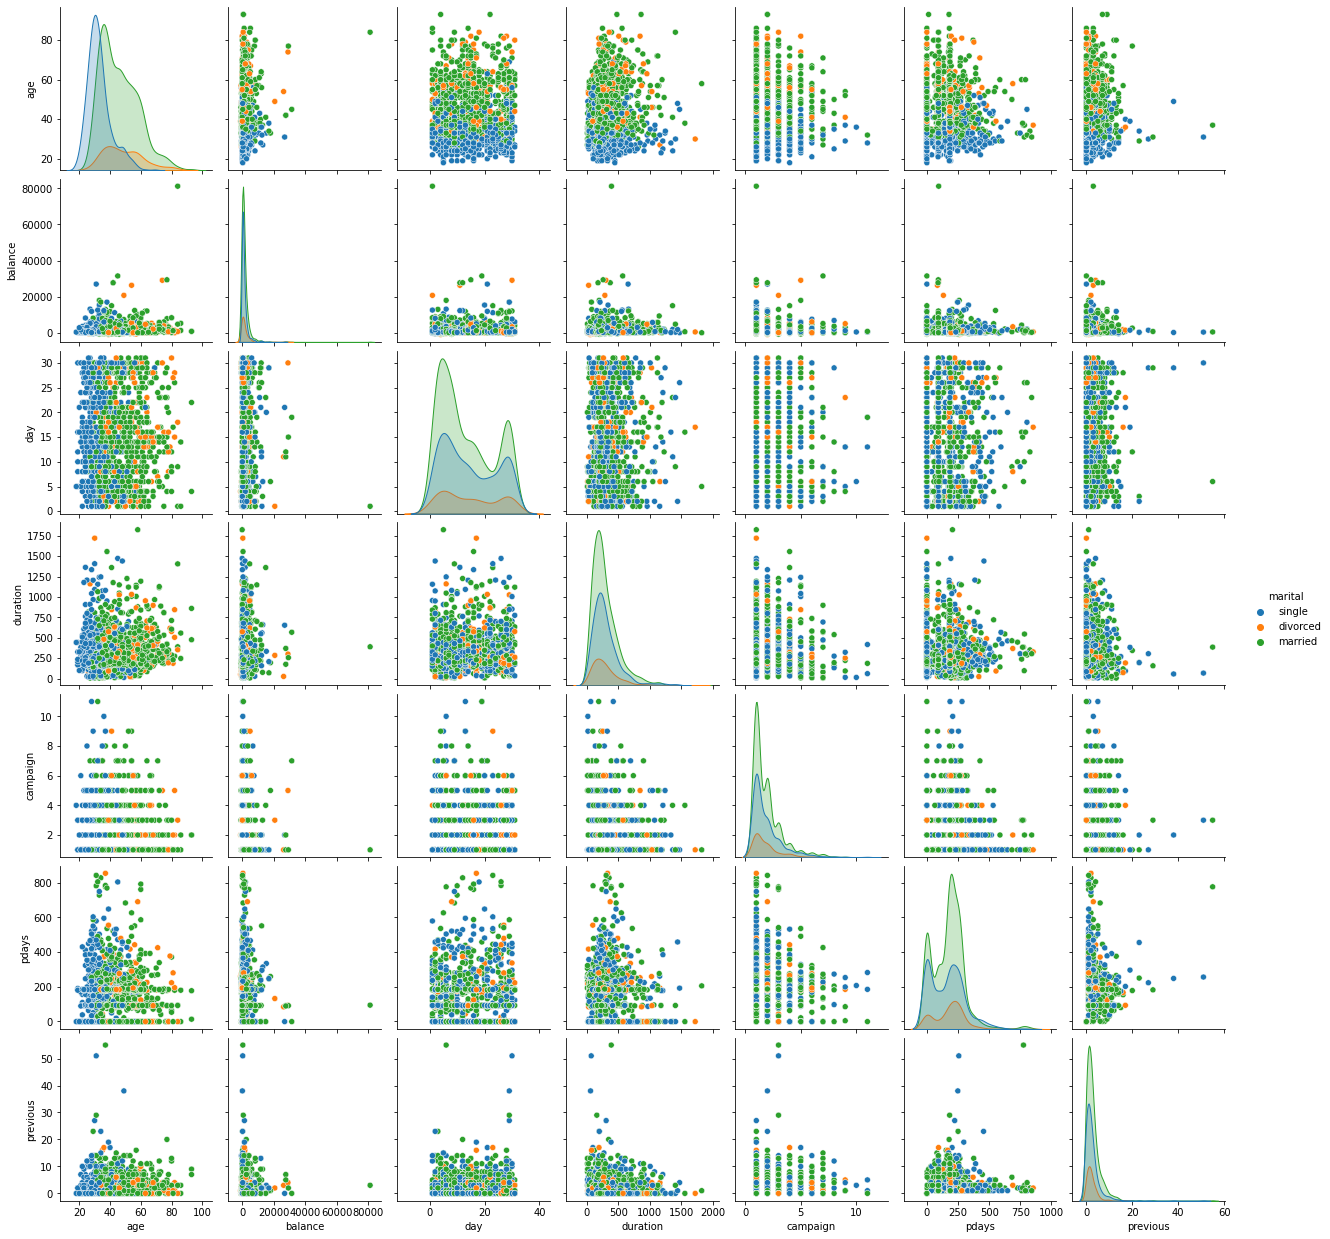

In [54]:
sns.pairplot(data=df, hue='marital')
plt.show()

Taking a look at the categorical data

In [55]:
df['job'].value_counts()

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

In [56]:
df['housing'].count()

2000

Converting some categorical data to numerical

In [57]:
le = LabelEncoder()
education_encoded = le.fit_transform(df['education'])
housing_encoded = le.fit_transform(df['housing'])

print("Education: ", education_encoded)
print("Housing: ", housing_encoded)

Education:  [2 1 1 ... 0 0 1]
Housing:  [1 1 1 ... 0 1 0]


# Distribution Analysis

*Lets check out the age distribution in this data set*

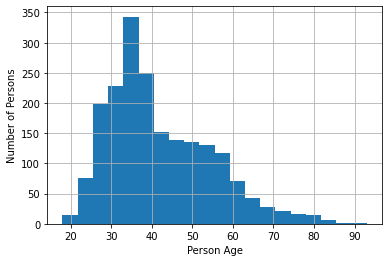

In [58]:
df['age'].hist(bins=20)
plt.xlabel('Person Age')
plt.ylabel('Number of Persons')
plt.show()

*How about the education level?*

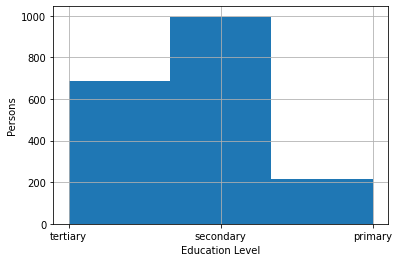

In [59]:
df['education'].hist(bins=3)
plt.xlabel('Education Level')
plt.ylabel('Persons')
plt.show()

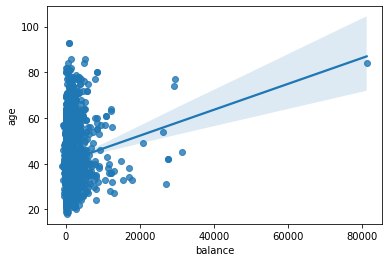

In [60]:
sns.regplot(data=df, x='balance', y='age')
plt.show()

These three plots give us some keen insights on the data

*   In the first histogram we can see the age distribution is as you would expect in a dataset like this with the median age being between 30 to 40
*   The second histogram shows us the majority of people have not achieved an educational level higher than secondary
*   The regplot suggests that typcially the higher the age the higher the bank balance





#The Question at hand

*What elements factor into owning your own home?*



*Firstly lets see if your relationship status migth affect your chances at a house*

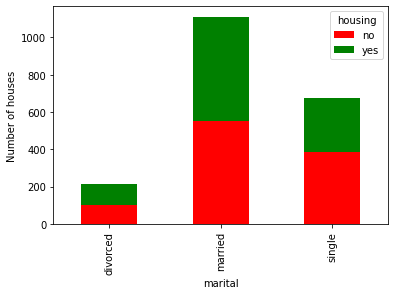

In [61]:
crosstab_ms = pd.crosstab(df['marital'], df['housing'])
crosstab_ms.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.ylabel('Number of houses')
plt.show()

*Interesting...How about your job?*

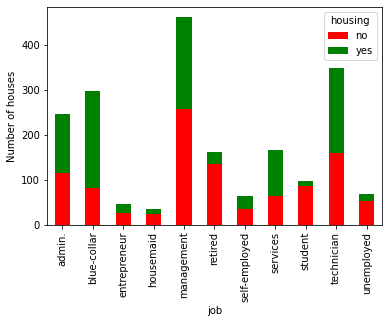

In [62]:
crosstab_CL = pd.crosstab(df['job'], df['housing'])
crosstab_CL.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.ylabel('Number of houses')
plt.show()

*Looks like entrepreneurship might be a scam!*

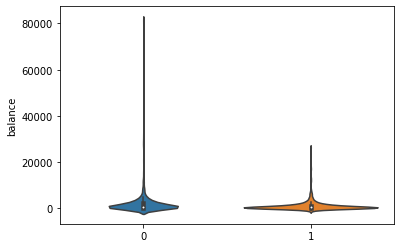

In [63]:
sns.violinplot(x=housing_encoded, y=df['balance'])
plt.show()

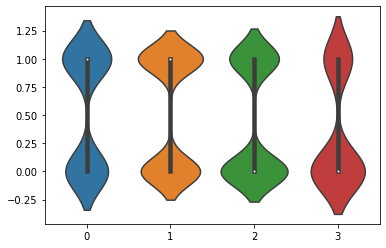

In [64]:
sns.violinplot(x=education_encoded, y=housing_encoded)
plt.show()

# My findings

After exploring and plotting relevent data to answer my question i have observed the following traits

*   Your Marital status affects your probabilty of owning a house in so much as: Single people are less likely to own a house. Devorced as well as Married individuals have about a 50% probabilty of owning a house.
*   Unemployed people, students,  low level jobs such as house maids have a significantly lower probabilty of owning a house in comparison to blue collar workers.
*   There is generally a more even distribution of bank account balance amoung those who do not own a home, which suggest that mortgage related debt varies signifucanly amoung those with homes.
*   In terms of education, the data set suggests that those who with primary school or less are more likely to own a home in comparison to those with higher education levels (>= secondary). It seems more exposure to the workforce allowed many to buy homes earlier than those that remained students, it also hints that older generations who tend to leave school earlier were able to aquire houses, maybe at a lower price?


